In [1]:
# importing the necessary packages
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
df=pd.read_csv('/content/tracks.csv')

In [3]:
df.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

**Correlation of the Features present in the Dataset**

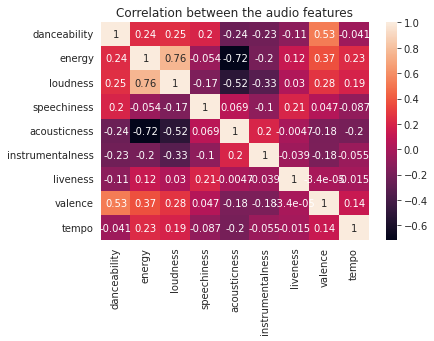

In [4]:
corr = df[['danceability', 
                  'energy', 
                  'loudness', 
                  'speechiness', 
                  'acousticness', 
                  'instrumentalness', 
                  'liveness',
                  'valence', 
                  'tempo' ]].corr()

plt.title('Correlation between the audio features')
sns.heatmap(corr, annot=True);

In [6]:
px.scatter(df, x='release_date', y='popularity', title='Release Date vs Popularity')

**It can be observed from the graph that the songs released more recently have higher popularity. Note that this dataset only contains songs released upto 'April 2021'.**

In [8]:
df.describe()

popularity   duration_ms       explicit   danceability  \
count  586672.000000  5.866720e+05  586672.000000  586672.000000   
mean       27.570053  2.300512e+05       0.044086       0.563594   
std        18.370642  1.265261e+05       0.205286       0.166103   
min         0.000000  3.344000e+03       0.000000       0.000000   
25%        13.000000  1.750930e+05       0.000000       0.453000   
50%        27.000000  2.148930e+05       0.000000       0.577000   
75%        41.000000  2.638670e+05       0.000000       0.686000   
max       100.000000  5.621218e+06       1.000000       0.991000   

              energy            key       loudness           mode  \
count  586672.000000  586672.000000  586672.000000  586672.000000   
mean        0.542036       5.221603     -10.206067       0.658797   
std         0.251923       3.519423       5.089328       0.474114   
min         0.000000       0.000000     -60.000000       0.000000   
25%         0.343000       2.000000     -12.891000       0.000000   
50%         0.549000       5.000000      -9.243000       1.000000   
75%         0.748000       8.000000      -6.482000       1.000000   
max         1.000000      11.000000       5.376000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  586672.000000  586672.000000     586672.000000  586672.000000   
mean        0.104864       0.449863          0.113451       0.213935   
std         0.179893       0.348837          0.266868       0.184326   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.034000       0.096900          0.000000       0.098300   
50%         0.044300       0.422000          0.000024       0.139000   
75%         0.076300       0.785000          0.009550       0.278000   
max         0.971000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  586672.000000  586672.000000   586672.000000  
mean        0.552292     118.464857        3.873382  
std         0.257671      29.764108        0.473162  
min         0.000000       0.000000        0.000000  
25%         0.346000      95.600000        4.000000  
50%         0.564000     117.384000        4.000000  
75%         0.769000     136.321000        4.000000  
max         1.000000     246.381000        5.000000

In [9]:
df['release_date'].sample(10)

111985    2008-08-11
402518    1992-08-10
155516    2007-01-01
284415    2003-08-01
426061    2006-04-10
534265    1996-05-20
11748           1937
119869    1964-07-13
329049    1990-07-02
140469    1967-01-01
Name: release_date, dtype: object

**The `release_date` column of the data frame contains inconsistent data. In some of the cases it only contains the year value of the date. To keep the data consistent we will add a new column named `year` containing only the release year of the song.**

In [10]:
def to_year(x):
    result = []
    x.to_string()
    for i in x:
        result.append(int(i[:4]))
    return result

df['year'] = to_year(df.release_date)

In [11]:
df['year'].sample(10)

331766    1999
84285     2011
33804     1960
361947    1975
469786    1992
446720    1986
252719    1999
580185    1990
522407    1985
9270      1934
Name: year, dtype: int64

**As the format of the date in release_date column is either year-month-day or year, we will extract the first 4 digits as year with the help of above function.**

**Along with the year column we can also add information about how old the song is at present. For that we will find the max value of year and calculate it's difference with every other row.**

In [13]:
max_year = df['year'].max()
df['years_old'] = max_year - df['year']
df['years_old'].sample(10)

506870    26
272041    27
421538    62
134783    86
169918    27
554273    20
190395    54
192742    43
210720     6
59148     36
Name: years_old, dtype: int64

In [14]:
df['tempo'].value_counts()

0.000      328
128.003     98
119.994     91
139.980     89
127.994     86
          ... 
63.011       1
187.157      1
200.225      1
70.039       1
63.696       1
Name: tempo, Length: 122706, dtype: int64

**The tempo column contains many zero values. We will replace the zero values with the mean of all the other non-zero values in the dataset.**

In [15]:
df.loc[df['tempo'] == 0 , 'tempo'] = df.loc[df['tempo'] > 0 , 'tempo'].mean()

df['tempo'].value_counts()

118.531126    328
128.003000     98
119.994000     91
139.980000     89
127.994000     86
             ... 
63.011000       1
187.157000      1
200.225000      1
70.039000       1
63.696000       1
Name: tempo, Length: 122706, dtype: int64

**The artist of the song can have a large impact on the popularity of the song. So we will add a new column artist_popularity containing the artist's mean popularity. For that we will also need the mean and count columns.**

In [16]:
df['mean'] = df.groupby('artists')['popularity'].transform('mean')
df['count'] = df.groupby('artists')['popularity'].transform('count')

In [17]:
def get_artist_popularity(x, y):
  result = y.groupby(x.artists).agg(['mean', 'count'])
  result.loc[result['count'] <= 2, 'mean'] = y.mean()
  result.loc[result['count'] >= 600, 'mean'] = 0
  return result

In [18]:
temp_df = df.drop('popularity', axis=1)
result_df = get_artist_popularity(temp_df, df['popularity'])['mean']
df['artist_popularity'] = np.where(df['artists'].isin(result_df.index), 
                                          df['artists'], 
                                          'unknown')
df['artist_popularity'] = df['artist_popularity'].map(result_df)

In [19]:
df[['artists', 'artist_popularity']].sample(10)

artists  artist_popularity
99652              ['Letta Mbulu']           9.565217
45029                  ['The Who']          28.845890
47297          ['Curtis Mayfield']          32.747126
280713                ['Ary Lobo']          10.967742
139596                     ['李清風']          19.800000
54793                 ['T.S.O.L.']          36.700000
49607   ['KC & The Sunshine Band']          39.578947
32292            ['Frank Sinatra']           0.000000
265508         ['Ella Fitzgerald']           0.000000
218137             ['Darío Gómez']          40.130435

We have identified 2 latent variables and added them into our dataframe through computation.

Artists Popularity
Years old (The songs released more recently have higher popularity) 

In [20]:
df['pop_bins'] = pd.cut(x=df['popularity'], bins=[-1, 49, 100])
df.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  liveness  valence    tempo  \
0   1922-02-22         0.645  0.4450  ...     0.151    0.127  104.851   
1   1922-06-01         0.695  0.2630  ...     0.148    0.655  102.009   
2   1922-03-21         0.434  0.1770  ...     0.212    0.457  130.418   
3   1922-03-21         0.321  0.0946  ...     0.104    0.397  169.980   
4         1922         0.402  0.1580  ...     0.311    0.196  103.220   

   time_signature  year  years_old      mean  count  artist_popularity  \
0               3  1922         99  1.000000      6           1.000000   
1               1  1922         99  0.000000     50           0.000000   
2               5  1922         99  0.064286    560           0.064286   
3               3  1922         99  0.064286    560           0.064286   
4               4  1922         99  3.910714     56           3.910714   

   pop_bins  
0  (-1, 49]  
1  (-1, 49]  
2  (-1, 49]  
3  (-1, 49]  
4  (-1, 49]  

[5 rows x 26 columns]

In [21]:
df['pop_bins'].unique()

[(-1, 49], (49, 100]]
Categories (2, interval[int64, right]): [(-1, 49] < (49, 100]]

In [22]:
df['pop_bins'].isna().sum()

0

In [23]:
df['popular'] = pd.cut(x=df['popularity'], bins=[-1, 49, 100], labels=[0, 1])
df.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  valence    tempo  time_signature  \
0   1922-02-22         0.645  0.4450  ...    0.127  104.851               3   
1   1922-06-01         0.695  0.2630  ...    0.655  102.009               1   
2   1922-03-21         0.434  0.1770  ...    0.457  130.418               5   
3   1922-03-21         0.321  0.0946  ...    0.397  169.980               3   
4         1922         0.402  0.1580  ...    0.196  103.220               4   

   year  years_old      mean  count  artist_popularity  pop_bins  popular  
0  1922         99  1.000000      6           1.000000  (-1, 49]        0  
1  1922         99  0.000000     50           0.000000  (-1, 49]        0  
2  1922         99  0.064286    560           0.064286  (-1, 49]        0  
3  1922         99  0.064286    560           0.064286  (-1, 49]        0  
4  1922         99  3.910714     56           3.910714  (-1, 49]        0  

[5 rows x 27 columns]

In [24]:
df['popular'].value_counts(normalize=True)

0    0.870723
1    0.129277
Name: popular, dtype: float64

**Selecting the features for training the model**

In [25]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year', 'years_old',
       'mean', 'count', 'artist_popularity', 'pop_bins', 'popular'],
      dtype='object')

In [26]:
input_columns = ['years_old', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 
                 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                 'liveness', 'valence', 'tempo', 'time_signature', 'artist_popularity']

target_column = 'popular'

In [27]:
numeric_cols = ['years_old', 'duration_ms', 'explicit', 'danceability', 'energy', 
                'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'valence', 'tempo', 'artist_popularity']
categorical_cols = ['key', 'time_signature']

In [28]:
df['key'].value_counts()

0     74950
7     73779
2     66552
9     65128
5     53614
4     48220
1     41736
11    39132
10    37710
8     33460
6     30856
3     21535
Name: key, dtype: int64

In [29]:
df['time_signature'].value_counts()

4    503808
3     64523
5     11400
1      6604
0       337
Name: time_signature, dtype: int64

**Training, Validation and Test Split**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)
print('train_df', train_df.shape)
print('val_df', val_df.shape)
print('test_df', test_df.shape)

train_df (352002, 27)
val_df (117335, 27)
test_df (117335, 27)


In [32]:
train_inputs = train_df[input_columns].copy()
val_inputs = val_df[input_columns].copy()
test_inputs = test_df[input_columns].copy()

In [33]:
Y_train = train_df[target_column].copy()
Y_val = val_df[target_column].copy()
Y_test = test_df[target_column].copy()

In [34]:
df[input_columns].isna().sum()

years_old            0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
artist_popularity    0
dtype: int64

**No missing values in the dataset, need to scale the values present in the dataframe**

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [37]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

**One-hot encoder**

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [40]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [41]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

**Perform Classification**

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

**Muller Classification Loop**

In [47]:
names = ["DecisionTree", "RandomForest", "AdaBoost", "GradientBoosting", "KNN"]
classifiers = [DecisionTreeClassifier(), 
               RandomForestClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               KNeighborsClassifier()]
clf_models = {}

In [48]:
for name, clf in zip(names, classifiers):
  model = clf.fit(X_train, Y_train)
  clf_models[name] = model
  acc = clf.score(X_test, Y_test)
  print('The accuracy for ',name,'is ', acc*100, '%')

The accuracy for  DecisionTree is  86.5411002684621 %
The accuracy for  RandomForest is  90.85268675160864 %
The accuracy for  AdaBoost is  90.2757063109899 %
The accuracy for  GradientBoosting is  90.99160523288022 %
The accuracy for  KNN is  88.73737588954702 %
